### Exercise 1

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *
import plotly.express as px
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# use a gray background
plt.style.use('ggplot')

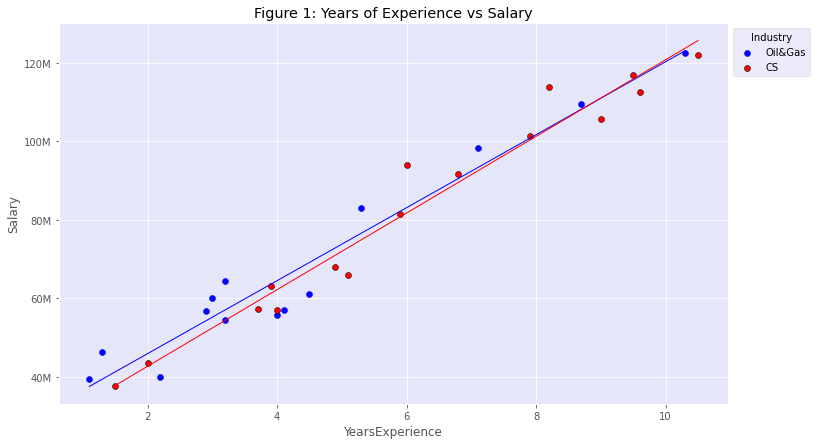

In [2]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.fM' % (x / 1000)


# Read dara from csv
data = pd.read_csv('salary-Industry.csv')
# Reshape data
cs, oil = [x for _, x in data.groupby(data['Industry'])]




cs_x = np.array(cs.YearsExperience).reshape((-1, 1))
cs_y = np.array(cs.Salary).reshape((-1, 1))
reg_cs = linear_model.LinearRegression()
reg_cs.fit(cs_x, cs_y)
cs_salary_pred = reg_cs.predict(cs_x)


oil_x = np.array(oil.YearsExperience).reshape((-1, 1))
oil_y = np.array(oil.Salary).reshape((-1, 1))



reg_oil = linear_model.LinearRegression()
reg_oil.fit(oil_x, oil_y)
oil_salary_pred = reg_oil.predict(oil_x)


# Plot outputs



plt.figure(figsize=(12,7))
ax = plt.axes()
plt.grid(True)
ax.set_facecolor("lavender")


plt.scatter(oil_x, oil_y,  color='blue', edgecolors='b', label ='Oil&Gas' )
plt.plot(oil_x, oil_salary_pred, color='blue', linewidth=1)
plt.scatter(cs_x, cs_y,  color='red', edgecolors='black', label = 'CS')
plt.plot(cs_x, cs_salary_pred, color='red', linewidth=1)

formatter = FuncFormatter(millions)
y_ticks = np.arange(0, 500000, 10000)
ax.yaxis.set_major_formatter(formatter)


plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Figure 1: Years of Experience vs Salary")
plt.legend(bbox_to_anchor=(1.0, 0.8, 0.3, 0.2), loc='upper left', title = 'Industry', facecolor='lavender')


plt.show()

### Exercise 2

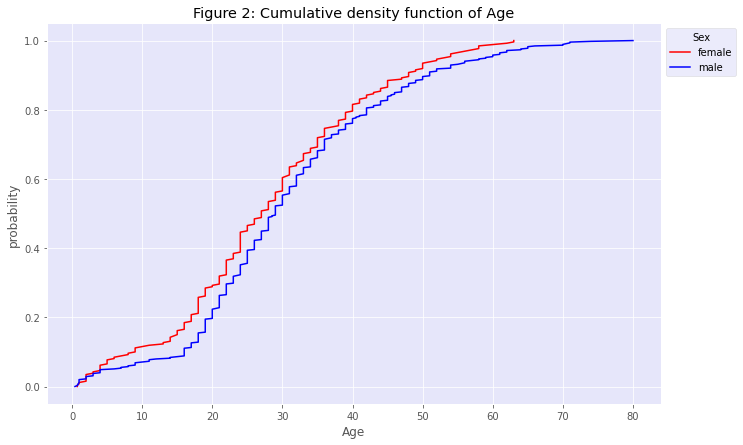

In [3]:

d = pd.read_csv('titanic.csv')

df = pd.DataFrame([d.Sex, d.Age]).transpose()
df.dropna(subset=["Age"], inplace=True)

female, male = [x for _, x in df.groupby(df['Sex'])]


# sort the data:
female_age_sorted = np.sort(female.Age)
male_age_sorted = np.sort(male.Age)

# calculate the proportional values of samples
p_female = 1. * np.arange(len(female.Age)) / (len(female.Age) - 1)
p_male = 1. * np.arange(len(male.Age)) / (len(male.Age) - 1)

plt.figure(figsize=(11,7))
ax = plt.axes()
ax.set_facecolor("lavender")

plt.plot(female_age_sorted, p_female, color='red', label='female')
plt.plot(male_age_sorted, p_male, color='blue', label='male')


plt.xlabel('Age')
plt.ylabel('probability')
plt.title('Figure 2: Cumulative density function of Age')

plt.legend(bbox_to_anchor=(1.0, 0.8, 0.3, 0.2), loc='upper left', title = 'Sex', facecolor='lavender')

plt.show()


### Exercise 3

In [9]:
titanic= pd.read_csv('titanic.csv')

import plotly.express as px
df = titanic
df['Pclass'] = df['Pclass'].astype('category')

df['Survived'] = df['Survived'].astype('category')
fig = px.box(df, x="Fare", y="Pclass", points="all")
fig.update_layout(title = 'Figure 3: Boxplot with displaying the underlying data')
fig.show()



summary = df.groupby(by=["Survived", "Pclass"]).count()
s = pd.DataFrame()
s['Stat']= summary.PassengerId
s['Survived']= (["0","0","0","1","1","1"])

s['Pclass']= ["1","2","3","1","2","3"]

fig = px.bar(s, x="Survived", y="Stat", color="Pclass",
            hover_data=['Stat'], barmode = 'stack', labels=("1", "0"), color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_layout(title = 'Figure 3: Stacked barplot presenting survived and dead passengers according to the class')
fig.show()
